# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     991.2
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           8.75e-42
Time:                        13:26:32   Log-Likelihood:                 1.9158
No. Observations:                  50   AIC:                             4.168
Df Residuals:                      46   BIC:                             11.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9007      0.083     59.221      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.408177    4.92179245  5.39082165  5.78348928  6.07948755  6.27331274
  6.37516944  6.40929397  6.4099724   6.41590747  6.46385985  6.5826084
  6.78822198  7.08141931  7.4474509   7.85852238  8.278361    8.66817517
  8.99302777  9.22757627  9.36023639  9.3950854   9.35119221  9.25948441
  9.15766696  9.08402738  9.07114518  9.1405392   9.29913207  9.53811286
  9.83438471 10.15435955 10.45947654 10.71253751 10.8838185  10.95595334
 10.92678684 10.80972891 10.63155133 10.42798922 10.23786988 10.09673355
 10.03099427 10.05360012 10.16190588 10.33810765 10.55216795 10.76675084
 10.94335606 11.04864453]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.04833181 10.89587231 10.61413079 10.25521311  9.88770892  9.57989851
  9.38303545  9.31879785  9.37398089  9.50372978]


## Plot comparison

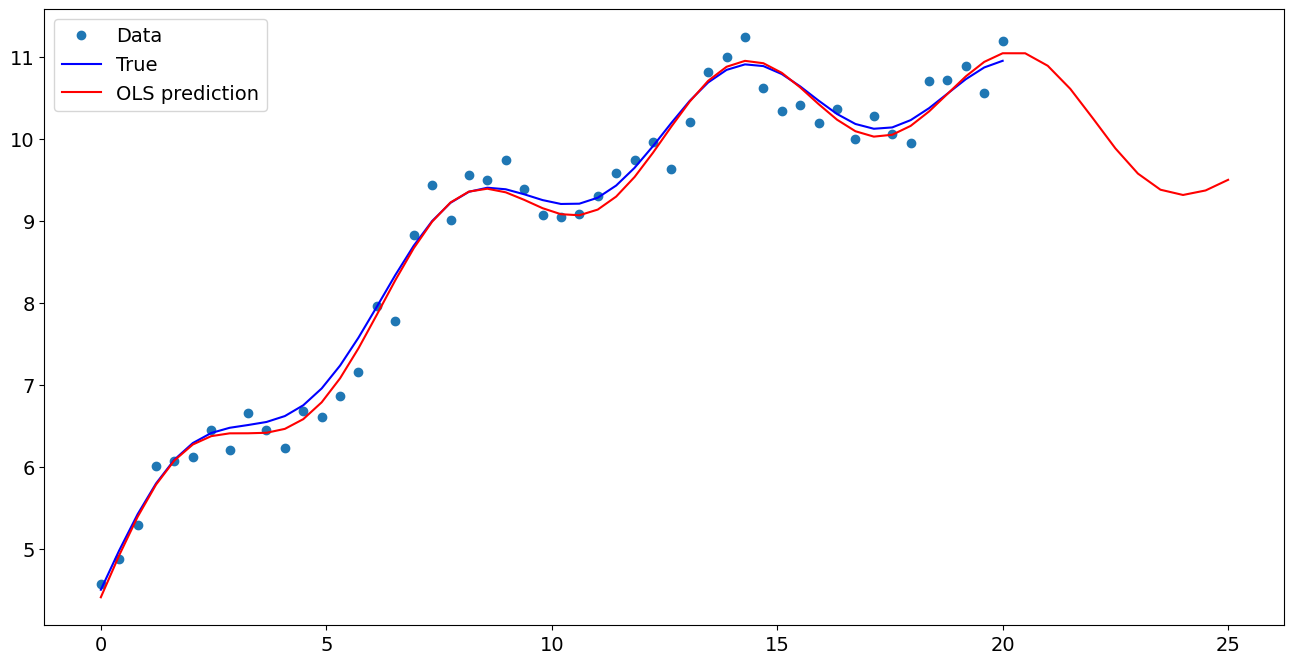

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.900678
x1                  0.502410
np.sin(x1)          0.583043
I((x1 - 5) ** 2)   -0.019700
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.048332
1    10.895872
2    10.614131
3    10.255213
4     9.887709
5     9.579899
6     9.383035
7     9.318798
8     9.373981
9     9.503730
dtype: float64